# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     | Mateo Tavares Trueba  |
| **Fecha**      | 29/08/2025  |
| **Expediente** | 746004  |

## Regresión polinomial

Observa la siguiente gráfica.

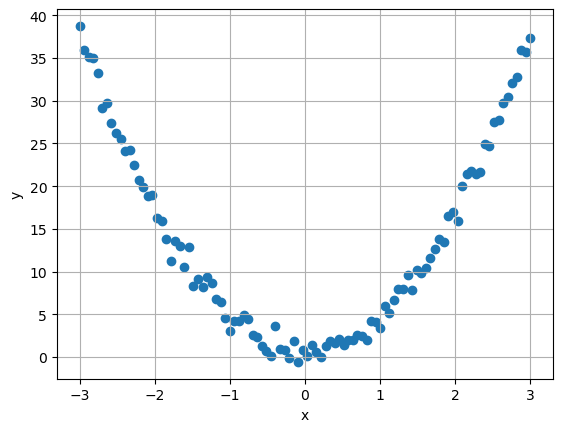

In [57]:
import matplotlib.pyplot as plt; import numpy as np
from sklearn.metrics import r2_score
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [58]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [59]:
lr1=LinearRegression()
lr1.fit(x.reshape(-1,1),y)
print(lr1.coef_,lr1.intercept_)


[-0.04955448] 13.30223225795873


Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

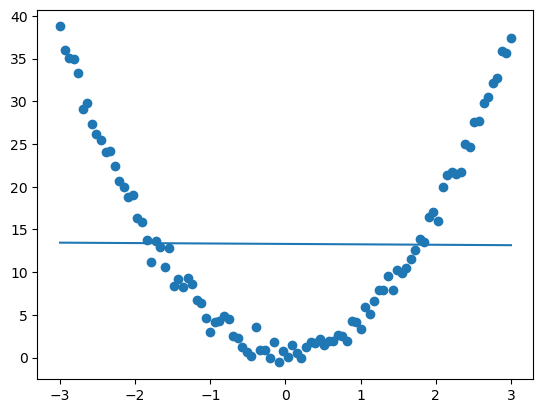

In [60]:
plt.scatter(x,y)
plt.plot(x.reshape(-1,1),lr1.predict(x.reshape(-1,1)))
plt.show()

In [61]:
r1=r2_score(y,lr1.predict(x.reshape(-1,1)))
print(r1)

5.80345273922811e-05


Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [62]:
x2=np.column_stack([x,x**2])
lr2=LinearRegression()
lr2.fit(x2,y)
print(lr2.coef_,lr2.intercept_)

[-0.04955448  4.14388884] 0.619420963180481


In [63]:
r2=r2_score(y,lr2.predict(x2))
print(r2)

0.9934118040713642


Crea una gráfica con las observaciones y la nueva curva que ajustaste.

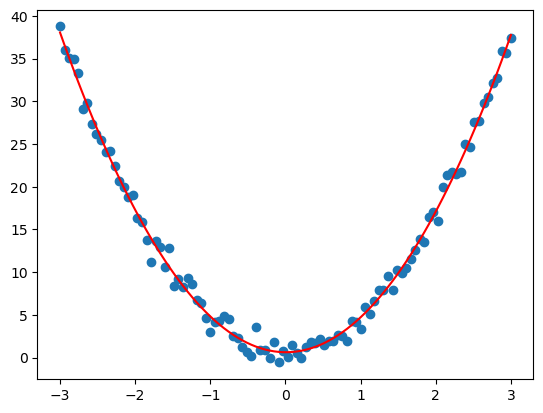

In [64]:
plt.scatter(x,y)
plt.plot(x,lr2.predict(x2),color='red')
plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [65]:
x3=np.column_stack([x,x**2,x**3])
lr3=LinearRegression()
lr3.fit(x3,y)
print(lr3.coef_,lr3.intercept_)

[-6.55753967e-02  4.14388884e+00  2.90847549e-03] 0.6194209631804846


In [66]:
x5=np.column_stack([x,x**2,x**3,x**4,x**5])
lr5=LinearRegression()
lr5.fit(x5,y)
print(lr5.coef_,lr5.intercept_)

[-2.76393644e-01  4.12831746e+00  1.10135698e-01  1.97920171e-03
 -1.05167018e-02] 0.6337116478282621


In [67]:
x7=np.column_stack([x,x**2,x**3,x**4,x**5,x**6,x**7])
lr7=LinearRegression()
lr7.fit(x7,y)
print(lr7.coef_,lr7.intercept_)

[-1.75155617e-01  4.18219958e+00  1.07431886e-02 -1.56446593e-02
  1.33331414e-02  1.40889740e-03 -1.61012799e-03] 0.6101810919961537


In [68]:
x9 = np.column_stack([x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9])
lr9 = LinearRegression()
lr9.fit(x9, y)
print(lr9.coef_, lr9.intercept_)

[-1.10778098e-01  4.26535653e+00 -9.23732104e-02 -6.55597796e-02
  5.72464222e-02  1.08500851e-02 -8.45937252e-03 -5.51840642e-04
  3.53081565e-04] 0.58901859964962


In [77]:
x11 = np.column_stack([x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11])
lr11 = LinearRegression()
lr11.fit(x11, y)
print(lr11.coef_, lr11.intercept_)

[ 9.00703987e-02  4.39720527e+00 -5.68294874e-01 -1.90428125e-01
  3.69496567e-01  5.17798355e-02 -9.13700221e-02 -5.98142327e-03
  9.92036867e-03  2.50411792e-04 -3.99285153e-04] 0.567083964495712


Crea una gráfica por cada modelo con las observaciones y su curva.

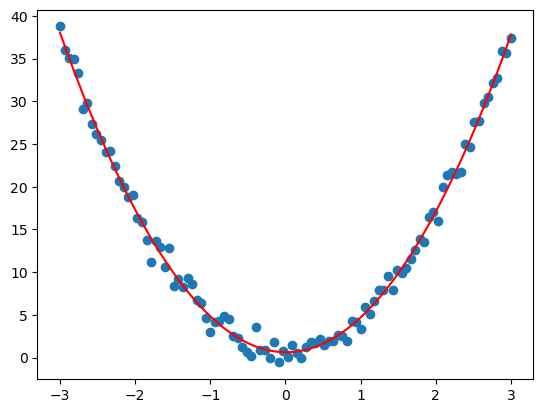

In [69]:
plt.scatter(x,y)
plt.plot(x,lr3.predict(x3),color='red')
plt.show()

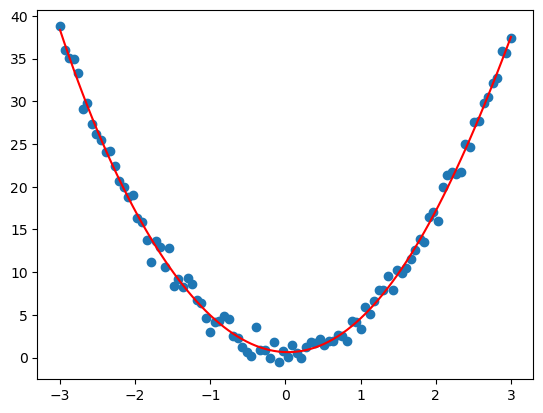

In [75]:
plt.scatter(x,y)
plt.plot(x,lr5.predict(x5),color='red')
plt.show()

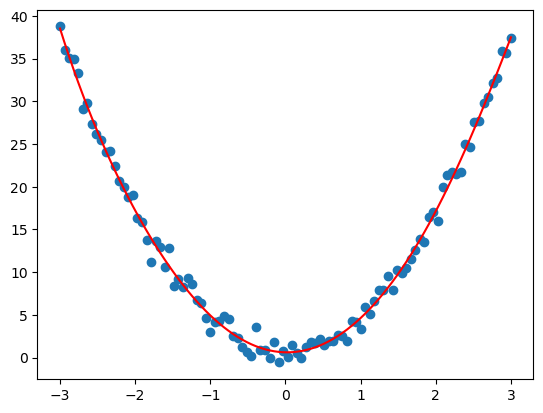

In [72]:
plt.scatter(x,y)
plt.plot(x,lr7.predict(x7),color='red')
plt.show()

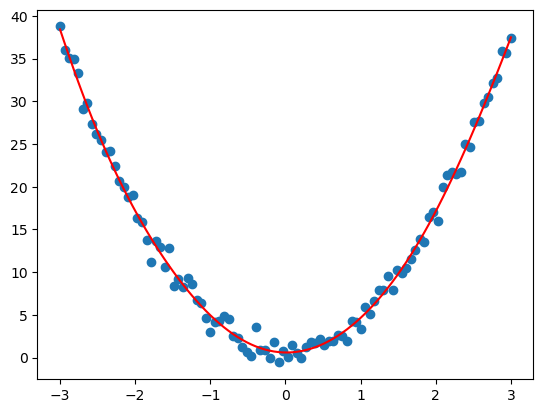

In [73]:
plt.scatter(x,y)
plt.plot(x,lr9.predict(x9),color='red')
plt.show()

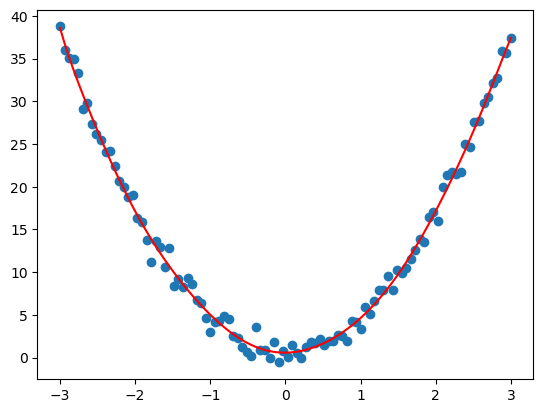

In [78]:
plt.scatter(x,y)
plt.plot(x,lr11.predict(x11),color='red')
plt.show()

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

In [79]:
r3 = r2_score(y, lr3.predict(x3))
r5 = r2_score(y, lr5.predict(x5))
r7 = r2_score(y, lr7.predict(x7))
r9 = r2_score(y, lr9.predict(x9))
r11 = r2_score(y, lr11.predict(x11))
print(r2,r3, r5, r7, r9, r11)

0.9934118040713642 0.9934129585186598 0.9934954953676421 0.9935089341876935 0.9935141799662259 0.9935338704150221


Aparentemente, el mejor modelo es el de onceabo grado, sin embargo en el inciso de abajo, podemos ver que este no es útil para extrapolar.

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [ ]:
p1=lr2.predict([[5, 5**2]])
p2=lr3.predict([[5, 5**2, 5**3]])
p3=lr5.predict([[5, 5**2, 5**3, 5**4, 5**5]])
p4=lr7.predict([[5, 5**2, 5**3, 5**4, 5**5, 5**6, 5**7]])
p5=lr9.predict([[5, 5**2, 5**3, 5**4, 5**5, 5**6, 5**7, 5**8, 5**9]])
p6=lr11.predict([[5, 5**2, 5**3, 5**4, 5**5, 5**6, 5**7, 5**8, 5**9, 5**10, 5**11]])
print(p1, p2, p3, p4, p5, p6)

[103.96886955] [104.25232439] [84.59895013] [33.74321848] [215.73637926] [-5265.34425348]


: 

Podemos ver que a pesar de que pueden llegar a ser buenos en R2 score, son demasiado sensibles a cambios en las x, como nuestros datos no consideran eso, elevar a grandes potencias puede ser inútil.

¿Cuál modelo crees que sea mejor?

Creo que el modelo simple cuadrático sería el mejor para extrapolar, ya que no es tan sensible a cambios fuera del rango de las x conocido como lo son modelos de potencias más altas, además, el r2 score es insignificante como para utilizar más grados.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3